## **Licao 1 - Os carros sao comos as lanchas** 

Nome: Mariana Oliveira Pires do Rio

Matricula: 190058455

Github: MarianaPRio




## Goal

O objetivo desse é descobrir se a imagem é um carro ou uma lancha para isso vamos precisar:

## Baixar dependencias

In [12]:
    !pip install spacy --upgrade
    !pip install -Uqq duckduckgo_search
    !pip install -Uqq fastai

Hora baixar imagens de carros e lanchas. Para isso vamos usar a funcao ddg_imagens

In [13]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=50): 
    print("Buscando")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Agora vamos baixar as imagens de "carros" ultilizando a funcao search_images

Buscando


c:\Python311\Lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
c:\Python311\Lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
c:\Python311\Lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


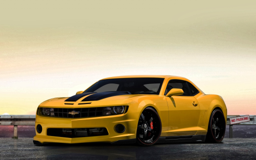

In [14]:
from fastdownload import download_url
from fastai.vision.all import *

download_url(search_images('carros', max_images=1)[0], 'carro.jpg', show_progress=False)
Image.open('carro.jpg').to_thumb(256,256)

Agora vamos baixar imagens de "lanchas"

Buscando


c:\Python311\Lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
c:\Python311\Lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
c:\Python311\Lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


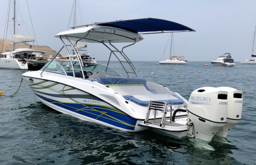

In [18]:
download_url(search_images('lanchas', max_images=1)[0], 'lancha.jpg', show_progress=False)
Image.open('lancha.jpg').to_thumb(256,256)

## Agora bora comecar com o dataset

In [ ]:
searches = 'carros','lanchas'
path = Path('carro_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} 90s style'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} 80s style'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Buscando
Buscando
Buscando
Buscando
Buscando
Buscando


Temos que verificar se tudo foi baixado corretamente para o modelo ter erro

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

34

## Agora vamos treinar modelo

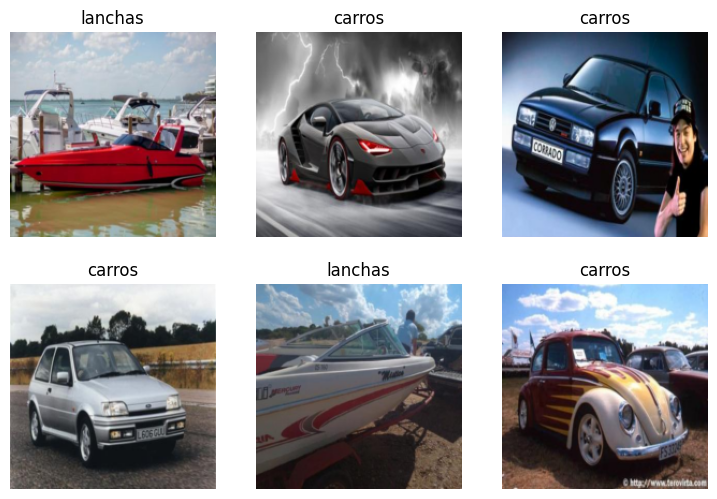

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

c:\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\pmari/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 11.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.313857,0.660549,0.220000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.244588,0.163639,0.040000,00:07
1,0.157441,0.063734,0.020000,00:07
2,0.104542,0.043025,0.020000,00:08


## Step 4 - Modelo

In [20]:
is_carro,_,probs = learn.predict(PILImage.create('carro.jpg'))
print(f"This is a: {is_carro}.")
print(f"Probability it's a car: {probs[0]:.4f}")

This is a: carros.
Probability it's a car: 1.0000


In [21]:
is_carro,_,probs = learn.predict(PILImage.create('lancha.jpg'))
print(f"This is a: {is_carro}.")
print(f"Probability it's a car: {probs[0]:.4f}")

This is a: lanchas.
Probability it's a car: 0.0000
